In [1]:
import os
import sys
import darkfield
import numpy as np
from bash_config import write_bash
from darkfield.diffra_v2 import HOME 

In [ ]:
################## DEFINING THE BASH PARAMETERS OF THE SIMULATION ################

upd_params = {
    'n_cpus': 24,
    'mem': '600GB',
    'yaml': 'Matt_2.yaml'
} #previously n_cpus=24, mem=650
path = os.path.join(HOME,'bash')
bash_path = write_bash(path, 6000, upd_params)
print(bash_path)


In [ ]:
#################### LAUNCHING THE SIMULATION #################
os.system(f"sbatch {bash_path}")

In [ ]:
#################### VISUALIZING THE QUEUE #################
!squeue --me

In [ ]:
!scancel 3858279

/home/yu79deg
[1e-11, 50]
 This is outside (-1.01e+02,-9.50e+02):start
 This is outside (-1.00e+02,-9.00e+02):beam_shaper


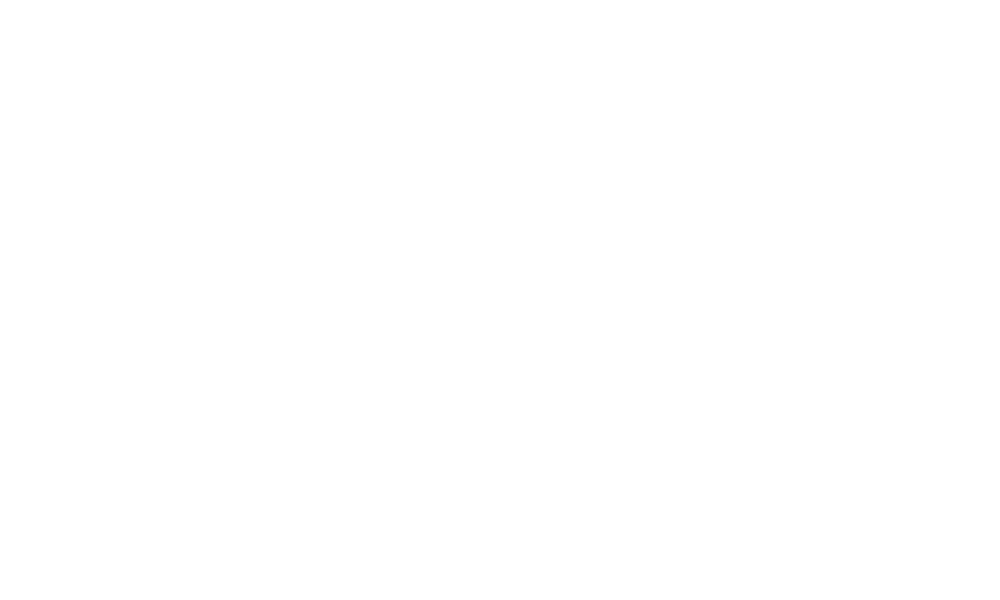

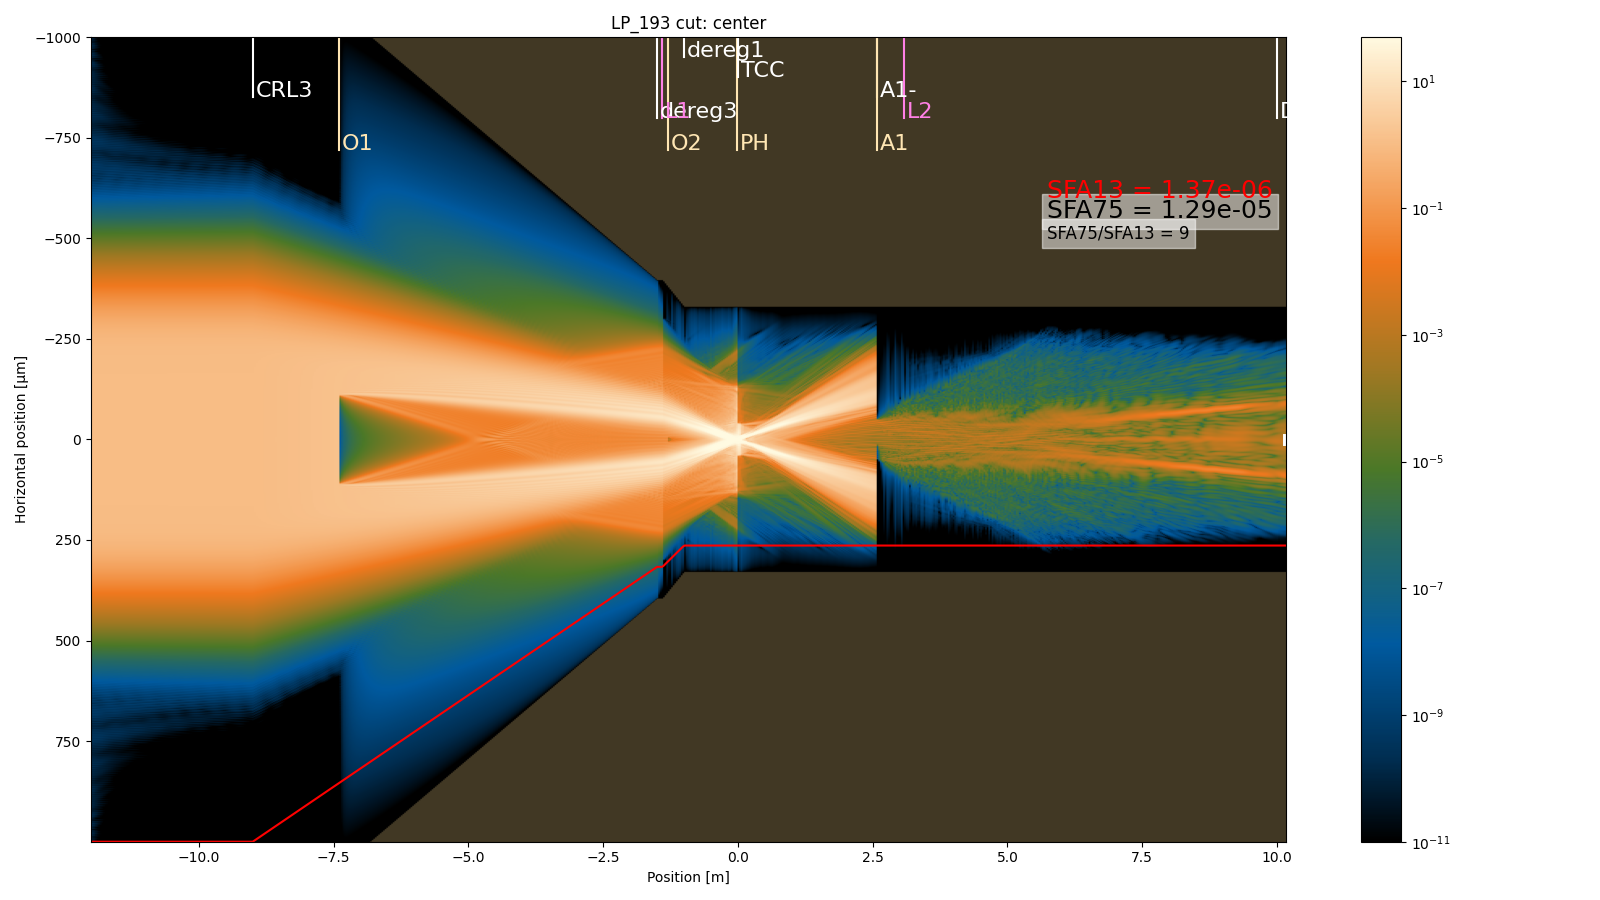

In [42]:
##################### FLOW PLOT OF SIMULATIONS ####################
###################################################################

#from darkfield.diffra_v2 import flow_plot
import importlib
import darkfield.diffra_v2
importlib.reload(darkfield.diffra_v2)
from darkfield.diffra_v2 import flow_plot

#%matplotlib widget

#Going back to the root folder :
%cd /home/yu79deg 

project_dir = "darkfield_p5438/Aime"

file = "LP_194" #name of the file
#file = "Matt_2" #name of the file

############# PLOTTING PARAMETERS ############
cl = [1e-11, 50] #Color scale (min, max) for the pcolor()
gyax_def = [-1000, 1000, 0.1] #vertical axis (start, end, stepsize) (in [um])
vertical_type = 'center' #(center, integral, vert-integral)
log = 1 #log or linear scale (LINEAR SCALE DOESNT WORK)
xl = [-15,15] #horizontal axis limits
xl = None #horizontal axis limits
flow_plot_crange = 1e-5 #relative scale to plot images.

#==================================================#
flow_figs = 0 #save the flow figs (Pretty long to run!)
create_video_ff = 0 #create a video from the saved pictures
#==================================================#

# Call the function
flow_plot(project_dir, file, cl=cl, gyax_def=gyax_def,
          vertical_type=vertical_type, log=log, xl=xl,
          flow_figs=flow_figs, flow_plot_crange=flow_plot_crange)



if create_video_ff and flow_figs:
    image_dir = f"darkfield_p5438/Aime/flow_figs/{file}"
    output_file = "movie.mp4"
    framerate = 10
    video_images_path = ""
    input_pattern = f"{image_dir}/ff_%04d.png"
    !ffmpeg -framerate {framerate} -i "{input_pattern}" -c:v libx264 -pix_fmt yuv420p "{image_dir}/{output_file}"

In [34]:
######################### GENERATE YAML FILES FOR SCANS ###############

!python /home/yu79deg/darkfield_p5438/yamls/yaml_scan_O2Size.py

Written LP_190.yaml (O2_size=0)
Written LP_191.yaml (O2_size=5)
Written LP_192.yaml (O2_size=10)
Written LP_193.yaml (O2_size=15)
Written LP_194.yaml (O2_size=20)
Written LP_195.yaml (O2_size=25)
Written LP_196.yaml (O2_size=30)
Written LP_197.yaml (O2_size=35)
Written LP_198.yaml (O2_size=40)
Written LP_199.yaml (O2_size=45)
Written LP_200.yaml (O2_size=50)
Written LP_201.yaml (O2_size=55)
Written LP_202.yaml (O2_size=60)
Written LP_203.yaml (O2_size=65)
Written LP_204.yaml (O2_size=70)
Written LP_205.yaml (O2_size=75)
Written LP_206.yaml (O2_size=80)
Written LP_207.yaml (O2_size=85)
Written LP_208.yaml (O2_size=90)
Written LP_209.yaml (O2_size=95)
Written LP_210.yaml (O2_size=100)
Written LP_211.yaml (O2_size=110)
Written LP_212.yaml (O2_size=120)
Written LP_213.yaml (O2_size=130)
Written LP_214.yaml (O2_size=140)
Written LP_215.yaml (O2_size=150)
Written LP_216.yaml (O2_size=160)
Written LP_217.yaml (O2_size=170)
Written LP_218.yaml (O2_size=180)
Written LP_219.yaml (O2_size=190)
Wr

In [35]:
######################## RUN ALL THE SIMULATIONS ###################

def get_simulation_list(manual_list=None, start=None, end=None):
    if manual_list:
        return manual_list
    elif start is not None and end is not None:
        return [f"LP_{i}" for i in range(start, end + 1)]
    else:
        raise ValueError("Either provide a manual list or a start and end value.")

###################### Option 1: manual list #######################
#sim_names = get_simulation_list(manual_list=["LP_30", "LP_31", "LP_35"])

#################### Option 2: auto-generated list #################
sim_names = get_simulation_list(start=190, end=223)

################### Parameters for SLURM submission ################
upd_params = {
    'n_cpus': 24,
    'mem': '600GB',
}

# Folder for bash scripts
path = os.path.join(HOME, 'bash')

#################### Loop over all simulation names ################
for sim in sim_names:
    upd_params['yaml'] = sim + '.yaml'  # Assign current yaml file
    bash_path = write_bash(path, 1000, upd_params)
    print(f"Submitting {sim} with bash file: {bash_path}")
    os.system(f"sbatch {bash_path}")


!squeue --me # See that all simulations are indeed running.


Submitting LP_190 with bash file: /home/yu79deg/darkfield_p5438/bash/job.slurm
Submitted batch job 3860972
Submitting LP_191 with bash file: /home/yu79deg/darkfield_p5438/bash/job.slurm
Submitted batch job 3860973
Submitting LP_192 with bash file: /home/yu79deg/darkfield_p5438/bash/job.slurm
Submitted batch job 3860974
Submitting LP_193 with bash file: /home/yu79deg/darkfield_p5438/bash/job.slurm
Submitted batch job 3860975
Submitting LP_194 with bash file: /home/yu79deg/darkfield_p5438/bash/job.slurm
Submitted batch job 3860976
Submitting LP_195 with bash file: /home/yu79deg/darkfield_p5438/bash/job.slurm
Submitted batch job 3860977
Submitting LP_196 with bash file: /home/yu79deg/darkfield_p5438/bash/job.slurm
Submitted batch job 3860978
Submitting LP_197 with bash file: /home/yu79deg/darkfield_p5438/bash/job.slurm
Submitted batch job 3860979
Submitting LP_198 with bash file: /home/yu79deg/darkfield_p5438/bash/job.slurm
Submitted batch job 3860980
Submitting LP_199 with bash file: /ho

In [38]:
!squeue --me # See that all simulations are indeed running.

             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
           3861004   hij-gpu   LP_222  yu79deg PD       0:00      1 (Resources)
           3861005   hij-gpu   LP_223  yu79deg PD       0:00      1 (Priority)
           3846796   hij-gpu jupyterl  yu79deg  R 2-07:47:16      1 gpu004
           3861000   hij-gpu   LP_218  yu79deg  R       0:13      1 gpu004
           3861001   hij-gpu   LP_219  yu79deg  R       0:13      1 gpu001
           3861002   hij-gpu   LP_220  yu79deg  R       0:13      1 gpu002
           3861003   hij-gpu   LP_221  yu79deg  R       0:13      1 gpu003


In [ ]:
#################### EXTRACT SHADOW FACTOR FROM SIMULATION ###################
import darkfield.mmmUtils_v2 as mu

project_dir = '/home/yu79deg/darkfield_p5438/Aime'
yaml_tag = 'LP_124'  # Simulation name


pickle_file = os.path.join(project_dir, 'pickles', f'{yaml_tag}_res.pickle')
print(f"Loading: {pickle_file}")


res = mu.loadPickle(pickle_file) #loading the general parameters
params=res[1]

SF_13 = params['intensities']['roi'] / params['intensities']['TCC']
SF_75 = params['intensities']['roi2'] / params['intensities']['TCC']

print(SF_13,SF_75)


Processing simulation: LP_178

Processing simulation: LP_179

Processing simulation: LP_180

Processing simulation: LP_181

Processing simulation: LP_182

Processing simulation: LP_183

Processing simulation: LP_184

Processing simulation: LP_185

Processing simulation: LP_186

Processing simulation: LP_187


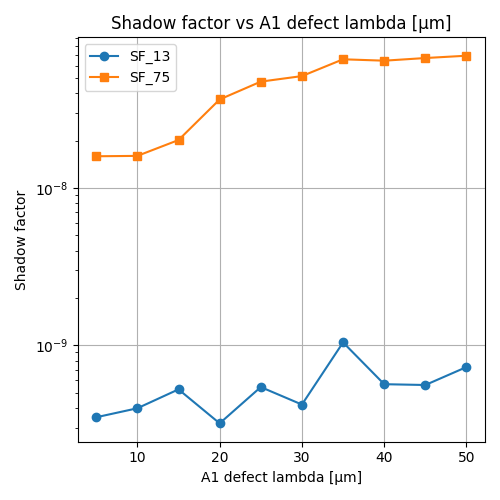

In [32]:
################## PLOT THE EVOLUTION OF SHADOW FACTOR AS A FUNCTION OF A GIVEN SCANNED PARAMETER ###############

import os
import yaml
import matplotlib.pyplot as plt
import darkfield.mmmUtils_v2 as mu  # This must be available in your environment

%matplotlib widget

# Setup paths
project_dir = '/home/yu79deg/darkfield_p5438/Aime'
yaml_dir = '/home/yu79deg/darkfield_p5438/yamls'
pickle_dir = os.path.join(project_dir, 'pickles')

# List of simulations (numbers only)
simulation_ids = np.arange(178,188)
simulations = [f'LP_{i}' for i in simulation_ids]

# Parameter config
ph_key = 'A1'               # The element key in YAML
scan_param_name = 'defect_lambda'    # Parameter to scan
xaxis_label = 'A1 defect lambda [µm]'  # Label for plot

# Data lists
scanned_values = []
sf_13_list = []
sf_75_list = []

# Loop through simulations
for sim in simulations:
    print(f"\nProcessing simulation: {sim}")

    # --- Load pickle file ---
    pickle_file = os.path.join(pickle_dir, f'{sim}_res.pickle')
    if not os.path.isfile(pickle_file):
        print(f"⚠️ Missing pickle file: {pickle_file}")
        continue

    res = mu.loadPickle(pickle_file)
    params = res[1]

    try:
        sf_13 = params['intensities']['roi'] / params['intensities']['TCC']
        sf_75 = params['intensities']['roi2'] / params['intensities']['TCC']
    except KeyError:
        print(f"⚠️ Missing intensity data in: {sim}")
        continue

    # --- Load YAML file ---
    yaml_file = os.path.join(yaml_dir, f'{sim}.yaml')
    if not os.path.isfile(yaml_file):
        print(f"⚠️ Missing YAML file: {yaml_file}")
        continue

    with open(yaml_file, 'r') as f:
        yaml_data = yaml.safe_load(f)

    # --- Extract parameter ---
    try:
        scan_value = yaml_data[ph_key][scan_param_name]
    except KeyError:
        print(f"⚠️ Parameter '{scan_param_name}' not found in element '{ph_key}' for {sim}")
        continue

    # Store data (convert to µm)
    scanned_values.append(scan_value * 1e6)
    sf_13_list.append(sf_13)
    sf_75_list.append(sf_75)

# --- Plotting ---
plt.figure(figsize=(5, 5))
plt.plot(scanned_values, sf_13_list, 'o-', label='SF_13')
plt.plot(scanned_values, sf_75_list, 's-', label='SF_75')
plt. yscale("log")
plt.xlabel(xaxis_label)
plt.ylabel("Shadow factor")
plt.title(f"Shadow factor vs {xaxis_label}")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
##################### FLOW PLOT OF SIMULATIONS ####################
###################################################################

import importlib
import darkfield.diffra_v2
importlib.reload(darkfield.diffra_v2)
from darkfield.diffra_v2 import flow_plot

import os

# Set working directory
os.chdir("/home/yu79deg")

project_dir = "darkfield_p5438/Aime"

############# LOOP CONTROL ############
LP_start = 193
LP_end = 217  # inclusive
#######################################

############# PLOTTING PARAMETERS ############
cl = [1e-11, 50]                      # Color scale (min, max) for pcolor()
gyax_def = [-1000, 1000, 0.1]         # vertical axis [start, end, stepsize] in µm
vertical_type = 'center'             # ('center', 'integral', 'vert-integral')
log = 1                              # log scale (linear doesn't work)
xl = None                            # horizontal axis limits (None = auto)
flow_plot_crange = 1e-5              # relative scale for plotting images
flow_figs = 0                        # save flow figs (0 = don't, 1 = yes)
create_video_ff = 0                  # make video from flow figs (requires ffmpeg)

# ========== LOOP THROUGH SIMULATIONS ========== #
for LP_num in range(LP_start, LP_end + 1):
    file = f"LP_{LP_num}"
    print(f"\n========== Processing {file} ==========\n")

    try:
        flow_plot(project_dir, file, cl=cl, gyax_def=gyax_def,
                  vertical_type=vertical_type, log=log, xl=xl,
                  flow_figs=flow_figs, flow_plot_crange=flow_plot_crange)
    except Exception as e:
        print(f"⚠️ Error processing {file}: {e}")
        continue

    # Create video from saved figures
    if create_video_ff and flow_figs:
        image_dir = os.path.join(project_dir, "flow_figs", file)
        output_file = os.path.join(image_dir, "movie.mp4")
        input_pattern = os.path.join(image_dir, "ff_%04d.png")

        cmd = f"ffmpeg -framerate 10 -i {input_pattern} -c:v libx264 -pix_fmt yuv420p {output_file}"
        print(f"Creating video: {output_file}")
        os.system(cmd)



========== Processing LP_193 ==========

[1e-11, 50]
 This is outside (-1.01e+02,-9.50e+02):start
 This is outside (-1.00e+02,-9.00e+02):beam_shaper

========== Processing LP_194 ==========

[1e-11, 50]
 This is outside (-1.01e+02,-9.50e+02):start
 This is outside (-1.00e+02,-9.00e+02):beam_shaper

========== Processing LP_195 ==========

[1e-11, 50]
 This is outside (-1.01e+02,-9.50e+02):start
 This is outside (-1.00e+02,-9.00e+02):beam_shaper

========== Processing LP_196 ==========



/home/yu79deg/darkfield_p5438/src/darkfield/mmmUtils_v2.py:925: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig=plt.figure(figsize=(figx,figy))


[1e-11, 50]
 This is outside (-1.01e+02,-9.50e+02):start
 This is outside (-1.00e+02,-9.00e+02):beam_shaper

========== Processing LP_197 ==========

[1e-11, 50]
 This is outside (-1.01e+02,-9.50e+02):start
 This is outside (-1.00e+02,-9.00e+02):beam_shaper

========== Processing LP_198 ==========

[1e-11, 50]
 This is outside (-1.01e+02,-9.50e+02):start
 This is outside (-1.00e+02,-9.00e+02):beam_shaper

========== Processing LP_199 ==========

[1e-11, 50]
 This is outside (-1.01e+02,-9.50e+02):start
 This is outside (-1.00e+02,-9.00e+02):beam_shaper

========== Processing LP_200 ==========

